# - 사고가 났을 때 연령대의 성비(남성) 상관관계 분석

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

In [3]:
import numpy as np
import pandas as pd

In [4]:
age_acc = pd.read_excel('C:\\Users\\masterT\\Desktop\\시흥시프로젝트\\연령-성비(남성) 사고분석.xlsx')
age_acc

,~20,21~30,31~40,41~50,51~60,61~64,65~,Male
0,68,418,532,716,346,61,48,1861
1,73,324,484,670,377,61,62,1744
2,70,325,507,649,443,71,68,1810
3,52,288,410,555,427,68,77,1605
4,58,268,382,539,452,84,97,1581
5,70,320,439,574,588,95,145,1871
6,69,310,386,569,520,115,131,1740
7,80,320,416,488,549,135,147,1753
8,62,347,455,512,664,149,195,1932
9,69,358,389,451,578,190,226,1853


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# X, Y 분할하기
Y = age_acc['Male']
X = age_acc.drop(['Male'], axis=1, inplace=False)

In [7]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [8]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [9]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [11]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 1073.916, RMSE : 32.771
R^2(Variance score) : 0.948


In [12]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  60.940465557733205
회귀 계수 값:  [-0.5  0.7  1.   1.   0.8  0.5  1. ]


In [13]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

65~      1.00
41~50    0.98
31~40    0.95
51~60    0.78
21~30    0.66
61~64    0.54
~20     -0.50
dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

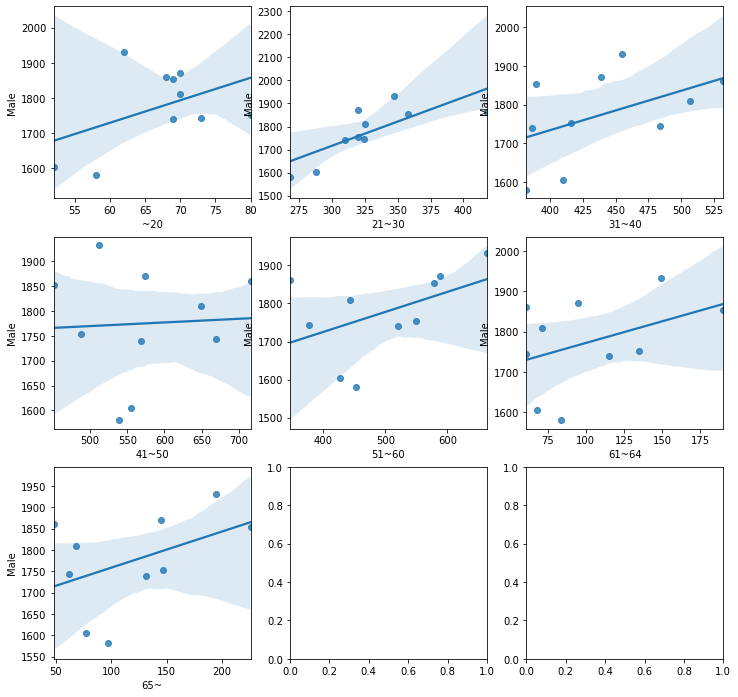

In [16]:
fig, axs = plt.subplots(figsize=(12, 12), ncols=3, nrows=3)

x_features = ['~20', '21~30', '31~40', '41~50', '51~60', '61~64', '65~']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='Male', data=age_acc, ax=axs[row][col])

# - 사고가 났을 때 연령대의 성비(여성) 상관관계 분석

In [93]:
age_acc2 = pd.read_excel('C:\\Users\\LG\Desktop\\빅데이터\\과제\\시흥시 프로젝트\\연령-성비(여성) 사고분석.xlsx')
age_acc2

,~20,21~30,31~40,41~50,51~60,61~64,65~,Female
0,68,418,532,716,346,61,48,328
1,73,324,484,670,377,61,62,304
2,70,325,507,649,443,71,68,325
3,52,288,410,555,427,68,77,269
4,58,268,382,539,452,84,97,299
5,70,320,439,574,588,95,145,359
6,69,310,386,569,520,115,131,359
7,80,320,416,488,549,135,147,382
8,62,347,455,512,664,149,195,452
9,69,358,389,451,578,190,226,409


In [96]:
# X, Y 분할하기
Y2 = age_acc2['Female']
X2 = age_acc2.drop(['Female'], axis=1, inplace=False)

In [97]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=156)

In [98]:
# 선형회귀분석 : 모델 생성
lr2 = LinearRegression()

In [99]:
# 선형회귀분석 : 모델 훈련
lr2.fit(X_train2, Y_train2)

LinearRegression()

In [100]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict2 = lr2.predict(X_test2)

In [101]:
mse2 = mean_squared_error(Y_test2, Y_predict2)
rmse2 = np.sqrt(mse2)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse2, rmse2))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test2, Y_predict2)))

MSE : 1002.622, RMSE : 31.664
R^2(Variance score) : 0.747


In [102]:
print('Y 절편 값: ', lr2.intercept_)
print('회귀 계수 값: ', np.round(lr2.coef_, 1))

Y 절편 값:  -78.2122477820136
회귀 계수 값:  [ 1.4  0.3  0.2 -0.   0.2  0.4  0. ]


In [103]:
coef2 = pd.Series(data = np.round(lr2.coef_, 2), index=X2.columns)
coef2.sort_values(ascending = False)

~20      1.39
61~64    0.45
21~30    0.33
51~60    0.22
31~40    0.19
65~      0.02
41~50   -0.05
dtype: float64

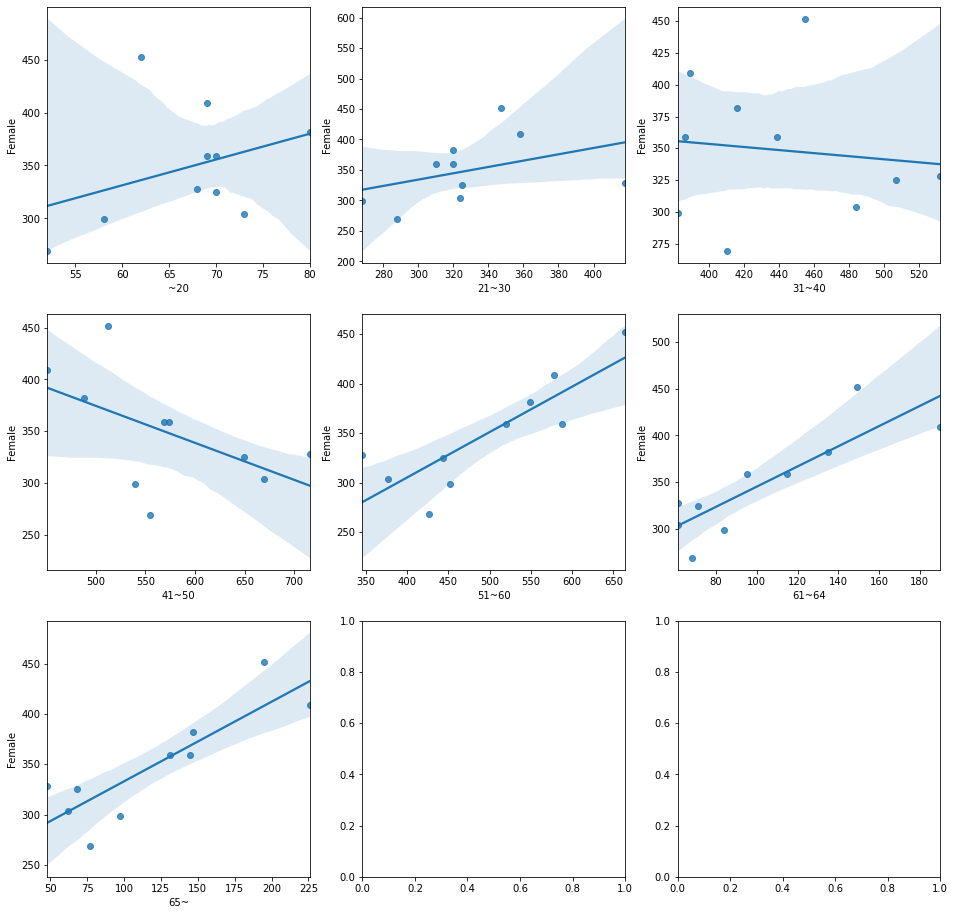

In [104]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=3)

x_features2 = ['~20', '21~30', '31~40', '41~50', '51~60', '61~64', '65~']


for i, feature in enumerate(x_features2):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='Female', data=age_acc2, ax=axs[row][col])